In [3]:
df = pd.read_csv('data.csv')

NameError: name 'pd' is not defined

In [ ]:
train_df,test_df = train_test_split(df, test_size=0.2)
tree = decision_tree_algorithm(train_df)
accuracy = calculate_accuracy(test_df, tree)

# Import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random 
from pprint import pprint

# Load and Prepare Data

In [6]:
# load data; drop 'Id' column; rename "label" column; process missing value

In [7]:
df = pd.read_csv('Iris.csv')
df = df.drop('Id',axis = 1)
df = df.rename(columns={'Species':'label'})

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
label            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Train-Test-Split

In [10]:
def train_test_split(df,test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [11]:
random.seed(0)
train_df,test_df = train_test_split(df,test_size=20)

In [12]:
test_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


# Helper Functions

In [13]:
data = train_df.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

## Data pure?

In [14]:
def check_purity(data):
    
    label_column = data[:,-1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

## Classify

In [15]:
def classify_data(data):
    
    label_column = data[:,-1]
    unique_classes, counts_unique_classes = np.unique(label_column,return_counts=True) 

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]

    return classification

In [16]:
classify_data(train_df[train_df.PetalWidthCm < 0.8].values)

'Iris-setosa'

## Potential splits?

In [17]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):
        potential_splits[column_index] =[]
        values = data[:,column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index !=0:
                current_value = unique_values[index]
                previous_value = unique_values[index -1]
                potential_split = (current_value + previous_value) / 2       # 为什么除以2  ？

                potential_splits[column_index].append(potential_split)
    
    return potential_splits

In [18]:
potential_splits = get_potential_splits(train_df.values)

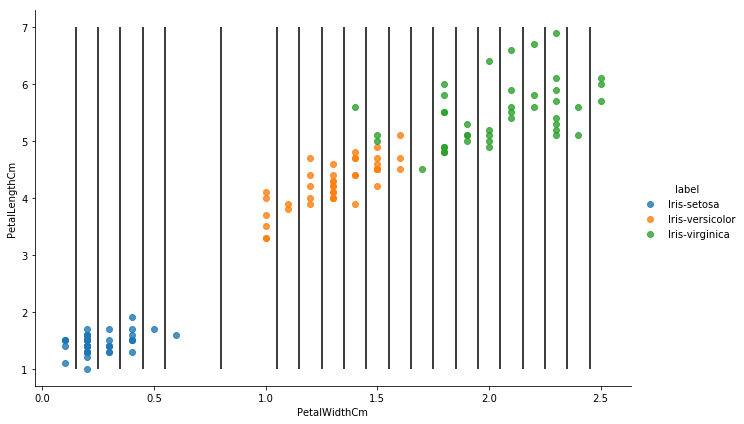

In [19]:
sns.lmplot(data = train_df, x='PetalWidthCm',y='PetalLengthCm',hue = 'label',fit_reg = False,height =6,aspect=1.5)

plt.vlines(x=potential_splits[3],ymin =1,ymax=7)       #  为什么 2 or 3
#plt.hlines(y=potential_splits[2],xmin=0,xmax=2.5)

## split data

In [20]:
def split_data(data,split_column,split_value):
    split_column_values = data[:,split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]
    
    return data_below,data_above

In [21]:
split_column = 3
split_value = 0.8

In [22]:
data_below,data_above = split_data(data,split_column,split_value)

(0, 2.6)

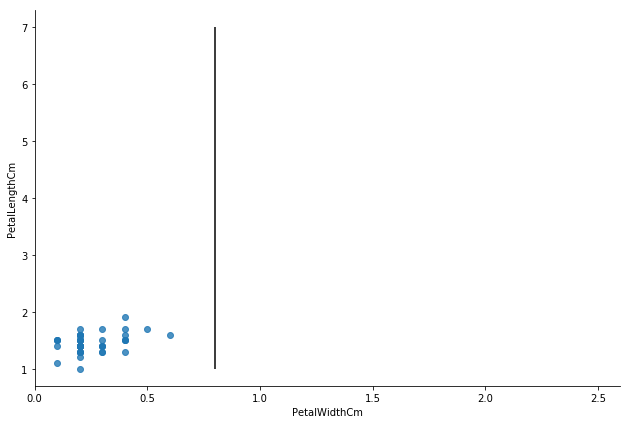

In [23]:
plotting_df = pd.DataFrame(data_below,columns=df.columns)

sns.lmplot(data = plotting_df,x='PetalWidthCm',y='PetalLengthCm',fit_reg=False,height=6,aspect=1.5)
plt.vlines(x=split_value,ymin=1,ymax=7)
plt.xlim(0,2.6)

### lowest overall entropy

In [24]:
def calculate_entropy(data):
    
    label_column = data[:,-1]
    _,counts= np.unique(label_column,return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    
    return entropy

In [25]:
calculate_entropy(data_below)

0.0

In [26]:
def calculate_overall_entropy(data_below,data_above):
    
    n_data_points = len(data_below) + len(data_above)

    p_data_below = len(data_below) / n_data_points
    p_data_above = len(data_above) / n_data_points

    overall_entropy = (p_data_below * calculate_entropy(data_below) + p_data_above * calculate_entropy(data_above))    
    
    return overall_entropy

In [27]:
calculate_overall_entropy(data_below,data_above)

0.6461538461538462

In [28]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below,data_above = split_data(data,split_column= column_index, split_value = value)
            current_overall_entropy = calculate_overall_entropy(data_below,data_above)

            if current_overall_entropy < overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value   
    
    return best_split_column,best_split_value

In [29]:
potential_splits = get_potential_splits(data)

In [30]:
determine_best_split(data,potential_splits)

(2, 2.5999999999999996)

### decision tree algorithm

#### representation of the decision tree

In [ ]:
sub_tree = {question: [yes_answer, no_answer]}

In [34]:
example_tree = {'PetalWidthCm <= 0.8':['Iris-setosa',
                        {'Petal_WidthCm <= 1.65':[{'PetalLengthCm <= 4.9':['Iris-versicolor',
                                                                           'Iris-virginica']},
                                                 'Iris-virginica']}]}

#### Algorithm

In [40]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth =5):
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df
        
    # base case
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification
    
    # recursive part
    else:
        counter += 1
        
        # helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below,data_above = split_data(data,split_column,split_value)
        
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)       #question ？？？  ;自动加括号; 同时加井号
        sub_tree = {question:[]}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below,counter,min_samples,max_depth)
        no_answer = decision_tree_algorithm(data_above,counter,min_samples,max_depth)
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [41]:
tree = decision_tree_algorithm(train_df, max_depth=3)
pprint(tree)

{'PetalLengthCm <= 2.5999999999999996': ['Iris-setosa',
                                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                                              'Iris-virginica']},
                                                                   'Iris-virginica']}]}


In [42]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'label'],
      dtype='object')

## Classification

In [ ]:
sub_tree = {question: [yes_answer, no_answer]}

In [44]:
example = test_df.iloc[0]
example

SepalLengthCm                5.1
SepalWidthCm                 2.5
PetalLengthCm                  3
PetalWidthCm                 1.1
label            Iris-versicolor
Name: 98, dtype: object

In [47]:
def classify_example(example,tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value =  question.split()

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer

    # recursive part
    else:
        residual_tree = answer
        return classify_example(example,residual_tree)


In [48]:
classify_example(example, tree)

'Iris-versicolor'

### Accuracy

In [49]:
def calculate_accuracy(df,tree):
    
    df['classification'] = df.apply(classify_example, axis=1,args=(tree,))
    df['classification_correct'] = df.classification == df.label
    
    accuracy = df.classification_correct.mean()
    
    return accuracy

In [50]:
accuracy = calculate_accuracy(test_df,tree)
accuracy

0.95

In [51]:
test_df.loc[77]

SepalLengthCm                         6.7
SepalWidthCm                            3
PetalLengthCm                           5
PetalWidthCm                          1.7
label                     Iris-versicolor
classification             Iris-virginica
classification_correct              False
Name: 77, dtype: object

In [52]:
pprint(tree)

{'PetalLengthCm <= 2.5999999999999996': ['Iris-setosa',
                                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                                              'Iris-virginica']},
                                                                   'Iris-virginica']}]}


### Titanic Data Set

#### Prepare and Load Data

In [6]:
df = pd.read_table('titanic.csv')  # desktop file

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df = pd.read_csv('/Users/mengmeng2018/Desktop/Decision-Tree-from-Scratch-master/Titanic.csv')
df['label'] = df.Survived
df = df.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis = 1)

# handling missing values
median_age = df.Age.median()
mode_embarked = df.Embarked.mode()[0]

df = df.fillna({'Age':median_age,'Embarked':mode_embarked})

In [8]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
label       891 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
